In [1]:
from ultralytics import YOLO

In [2]:
model = YOLO("weights/facialv1.pt")

In [9]:
image_path = 'uploads/2024-02-17-19-51.jpeg'

In [3]:
results = model(image_path)


image 1/1 /Users/solvedbiscuit71/Code/autondance/autondance-demo-server/uploads/2024-02-17-19-51.jpeg: 480x640 20 persons, 560.4ms
Speed: 4.9ms preprocess, 560.4ms inference, 7.2ms postprocess per image at shape (1, 3, 480, 640)


In [4]:
boxes = results[0].boxes.xywh

In [6]:
boxes.numpy()

array([[     506.74,      2121.4,      190.12,      216.53],
       [     3591.6,      1820.4,      147.27,      164.97],
       [     3198.5,      1764.7,      133.26,      168.71],
       [     1921.2,      1828.9,      137.83,      168.21],
       [     1890.1,      2044.9,      162.22,      204.24],
       [       3051,      1664.9,      120.71,      142.91],
       [     2264.7,      1681.5,      111.27,      139.14],
       [     830.74,      1893.8,      141.47,      179.26],
       [     1183.8,      1834.6,      133.35,       169.9],
       [     997.69,      1720.1,      122.57,       148.9],
       [     2003.3,      1586.6,      104.58,      127.48],
       [     1139.6,      1597.5,      102.82,      127.57],
       [     1285.9,      1529.4,       91.25,      111.11],
       [     1339.2,      1727.8,      109.19,      142.26],
       [     2903.7,        1467,      87.719,       95.51],
       [     3123.5,      1478.9,      87.867,      102.61],
       [     2188.8,    

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [11]:
import cv2

In [12]:
image = cv2.imread(image_path)

In [13]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

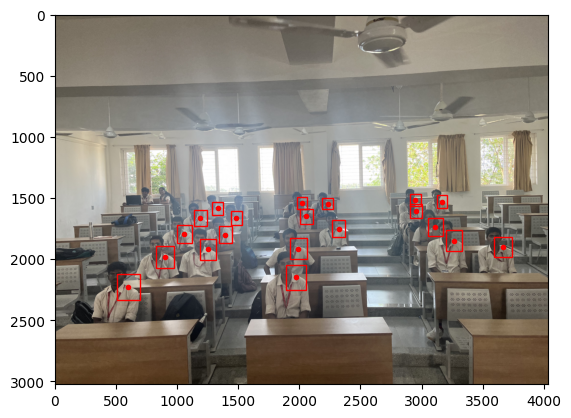

In [20]:
_, ax = plt.subplots(1)
ax.imshow(image)

for box in boxes:
    x, y, w, h = box
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    center_x = x + w / 2
    center_y = y + h / 2
    ax.plot(center_x, center_y, 'r.')

In [21]:
import json

In [24]:
annotation = json.load(open('annotation.json'))

In [25]:
annotation

{'c1ar1': [[154, 496], [256, 496], [177, 582], [52, 582]],
 'c1br1': [[256, 496], [382, 496], [350, 582], [177, 582]],
 'c1ar2': [[216, 446], [303, 446], [256, 496], [154, 496]],
 'c1br2': [[303, 446], [400, 446], [382, 496], [256, 496]],
 'c1ar3': [[252, 414], [331, 414], [303, 446], [216, 446]],
 'c1br3': [[331, 414], [412, 414], [400, 446], [303, 446]],
 'c1ar4': [[282, 390], [354, 390], [331, 414], [252, 414]],
 'c1br4': [[354, 390], [421, 390], [412, 414], [331, 414]],
 'c1ar5': [[305, 370], [371, 370], [354, 390], [282, 390]],
 'c1br5': [[371, 370], [428, 370], [421, 390], [354, 390]],
 'c2ar1': [[451, 485], [553, 485], [558, 560], [428, 560]],
 'c2br1': [[553, 485], [645, 485], [671, 560], [558, 560]],
 'c2ar2': [[464, 440], [552, 440], [553, 485], [451, 485]],
 'c2br2': [[552, 440], [627, 440], [645, 485], [553, 485]],
 'c2ar3': [[475, 405], [549, 405], [552, 440], [464, 440]],
 'c2br3': [[549, 405], [615, 405], [627, 440], [552, 440]],
 'c2ar4': [[480, 386], [550, 386], [551, 

In [27]:
layout = list(annotation.values())

In [29]:
layout[:5]

[[[154, 496], [256, 496], [177, 582], [52, 582]],
 [[256, 496], [382, 496], [350, 582], [177, 582]],
 [[216, 446], [303, 446], [256, 496], [154, 496]],
 [[303, 446], [400, 446], [382, 496], [256, 496]],
 [[252, 414], [331, 414], [303, 446], [216, 446]]]

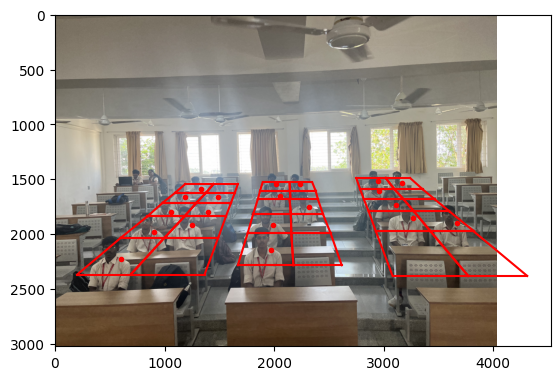

In [56]:
_, ax = plt.subplots(1)
ax.imshow(image)

for box in boxes:
    x, y, w, h = box
    # rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    # ax.add_patch(rect)

    center_x = x + w / 2
    center_y = y + h / 2
    ax.plot(center_x, center_y, 'r.')

new_layout = {}

for id, box in zip(annotation, layout):
    new_box = []
    for i in range(len(box)):
        x1, y1 = box[i]
        x2, y2 = box[(i+1)%len(box)]
        scale = 3.9
        y_shift = 100
        x_shift = -50
        x1 = x1 * scale
        y1 = y1 * scale + y_shift
        x2 = x2 * scale
        y2 = y2 * scale + y_shift
        new_box.append([round(x1), round(y1)])
        ax.plot([x1, x2], [y1, y2], 'r-')
    new_layout[id] = new_box

In [57]:
new_layout

{'c1ar1': [[601, 2034], [998, 2034], [690, 2370], [203, 2370]],
 'c1br1': [[998, 2034], [1490, 2034], [1365, 2370], [690, 2370]],
 'c1ar2': [[842, 1839], [1182, 1839], [998, 2034], [601, 2034]],
 'c1br2': [[1182, 1839], [1560, 1839], [1490, 2034], [998, 2034]],
 'c1ar3': [[983, 1715], [1291, 1715], [1182, 1839], [842, 1839]],
 'c1br3': [[1291, 1715], [1607, 1715], [1560, 1839], [1182, 1839]],
 'c1ar4': [[1100, 1621], [1381, 1621], [1291, 1715], [983, 1715]],
 'c1br4': [[1381, 1621], [1642, 1621], [1607, 1715], [1291, 1715]],
 'c1ar5': [[1190, 1543], [1447, 1543], [1381, 1621], [1100, 1621]],
 'c1br5': [[1447, 1543], [1669, 1543], [1642, 1621], [1381, 1621]],
 'c2ar1': [[1759, 1992], [2157, 1992], [2176, 2284], [1669, 2284]],
 'c2br1': [[2157, 1992], [2516, 1992], [2617, 2284], [2176, 2284]],
 'c2ar2': [[1810, 1816], [2153, 1816], [2157, 1992], [1759, 1992]],
 'c2br2': [[2153, 1816], [2445, 1816], [2516, 1992], [2157, 1992]],
 'c2ar3': [[1852, 1680], [2141, 1680], [2153, 1816], [1810, 1

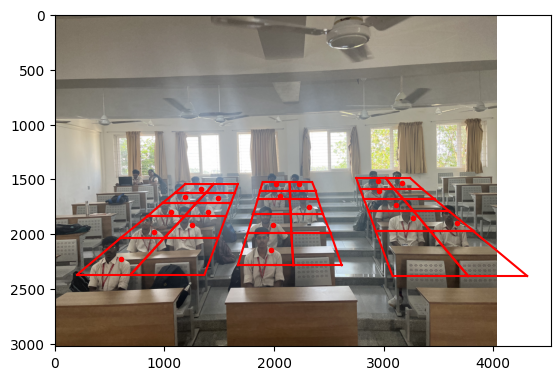

In [60]:
_, ax = plt.subplots(1)
ax.imshow(image)

for box in boxes:
    x, y, w, h = box
    # rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    # ax.add_patch(rect)

    center_x = x + w / 2
    center_y = y + h / 2
    ax.plot(center_x, center_y, 'r.')

for box in new_layout.values():
    for i in range(len(box)):
        x1, y1 = box[i]
        x2, y2 = box[(i+1)%len(box)]
        ax.plot([x1, x2], [y1, y2], 'r-')

In [61]:
with open('new_annotation.json', 'w') as file:
    json.dump(new_layout, file)

In [64]:
seats = []
for id, layout in new_layout.items():
    seat = {}
    seat["id"] = id
    for i in range(len(layout)):
        seat[f"x{i+1}"] = layout[i][0]
        seat[f"y{i+1}"] = layout[i][1]
    seat["classroom_id"] = "AB1-201"
    seats.append(seat)

In [66]:
with open('scripts/new_seats.json', 'w') as file:
    json.dump(seats, file)